This is a base jupyter notebook for other solutions. It loads the dataset, splits it to the training part (90%) and testing part (10%). It does not learn anything, it just randomly guesses the score for each student in testing part. It generates the solution with random floats inbetween 0 and 10.

In [47]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load libraries

In [48]:
%autoreload

# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import plotly.express as px
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [49]:
# read the dataset
dataset = pd.read_csv('../../dataset/dataset.csv')

# define features and target variables
X = dataset.filter(regex=r'AU')
y = dataset['score']


In [50]:
# check dataframes' shape
print(dataset.shape)
print(X.shape)
print(y.shape)

(192, 90)
(192, 17)
(192,)


In [51]:
# normalize data
X_normalized = X / 5
y_normalized = y / 10
print(X_normalized.max())
print(X_normalized.max())

AU01_r    0.515079
AU02_r    0.244080
AU04_r    0.400921
AU05_r    0.251520
AU06_r    0.226741
AU07_r    0.465767
AU09_r    0.321114
AU10_r    0.273995
AU12_r    0.256611
AU14_r    0.490359
AU15_r    0.203866
AU17_r    0.390946
AU20_r    0.251535
AU23_r    0.221596
AU25_r    0.194427
AU26_r    0.257319
AU45_r    0.203654
dtype: float64
AU01_r    0.515079
AU02_r    0.244080
AU04_r    0.400921
AU05_r    0.251520
AU06_r    0.226741
AU07_r    0.465767
AU09_r    0.321114
AU10_r    0.273995
AU12_r    0.256611
AU14_r    0.490359
AU15_r    0.203866
AU17_r    0.390946
AU20_r    0.251535
AU23_r    0.221596
AU25_r    0.194427
AU26_r    0.257319
AU45_r    0.203654
dtype: float64


In [52]:
# Split the dataset into training and testing part
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.1, random_state=69)


<AxesSubplot: >

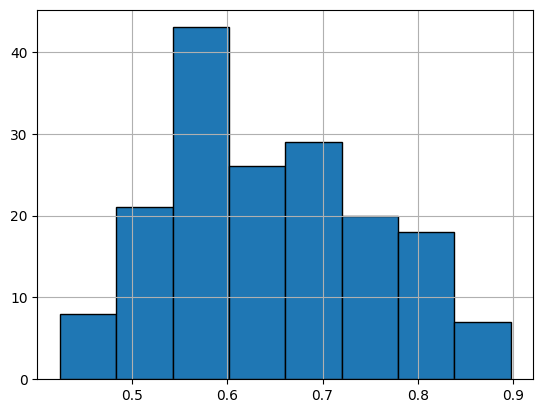

In [53]:
y_train.hist(bins=8, edgecolor='black')

In [54]:
# Define the Random Forest model
random_forest = LinearRegression()

random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# mean absolute error
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)

print(mae)

0.05111070033399998


/home/karel/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/karel/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/karel/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/karel/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sparse

In [55]:
# feature engineering: convert facial expressions to emotions (according to 
# https://imotions.com/blog/learning/research-fundamentals/facial-action-coding-system/#head-movement-action-units)

X_emotions = pd.DataFrame({
    "joy": X_normalized[["AU06_r", "AU12_r"]].mean(axis=1),
    "sadness": X_normalized[["AU01_r", "AU04_r", "AU15_r"]].mean(axis=1),
    "surprise": X_normalized[["AU01_r", "AU02_r", "AU05_r", "AU26_r"]].mean(axis=1),                       
    "fear": X_normalized[["AU01_r", "AU02_r", "AU04_r", "AU05_r", "AU07_r", "AU20_r", "AU26_r"]].mean(axis=1),
    "anger": X_normalized[["AU04_r", "AU05_r", "AU07_r", "AU23_r"]].mean(axis=1),
    "disgust": X_normalized[["AU09_r", "AU15_r", "AU25_r"]].mean(axis=1), # there should be AU16_r instead of 
    # AU25_r, but the dataset does not contain AU16_r and AU25_r should be correlated with AU16_r
    "contempt": X_normalized[["AU12_r", "AU14_r"]].mean(axis=1)
})


In [59]:
# Split the dataset into training and testing part
X_train_emot, X_test_emot, y_train_emot, y_test_emot = train_test_split(X_emotions, y_normalized, test_size=0.1, random_state=69)

# Define the Random Forest model
random_forest_emot = LinearRegression()

random_forest_emot.fit(X_train_emot, y_train_emot)
y_pred_emot = random_forest_emot.predict(X_test_emot)

# mean absolute error
mae_emot = mean_absolute_error(y_true=y_test_emot, y_pred=y_pred_emot)

print(mae_emot)

0.058536685363640685


/home/karel/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/karel/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/karel/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/karel/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sparse

In [57]:
# # print correlation matrix to file
# with open('facial_video_correlation.html', 'w') as f:
#     print(facial_video.corr().abs().style.background_gradient().to_html(), file=f)
# 
# # show correlation matrix
# px.imshow(selected_columns.corr(),title="NTNU dataset")

In [58]:
y_

NameError: name 'y_' is not defined